In [1]:
import wfdb
import numpy as np
import pywt
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, Conv1DTranspose, LSTM, Dense, Input, Add, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

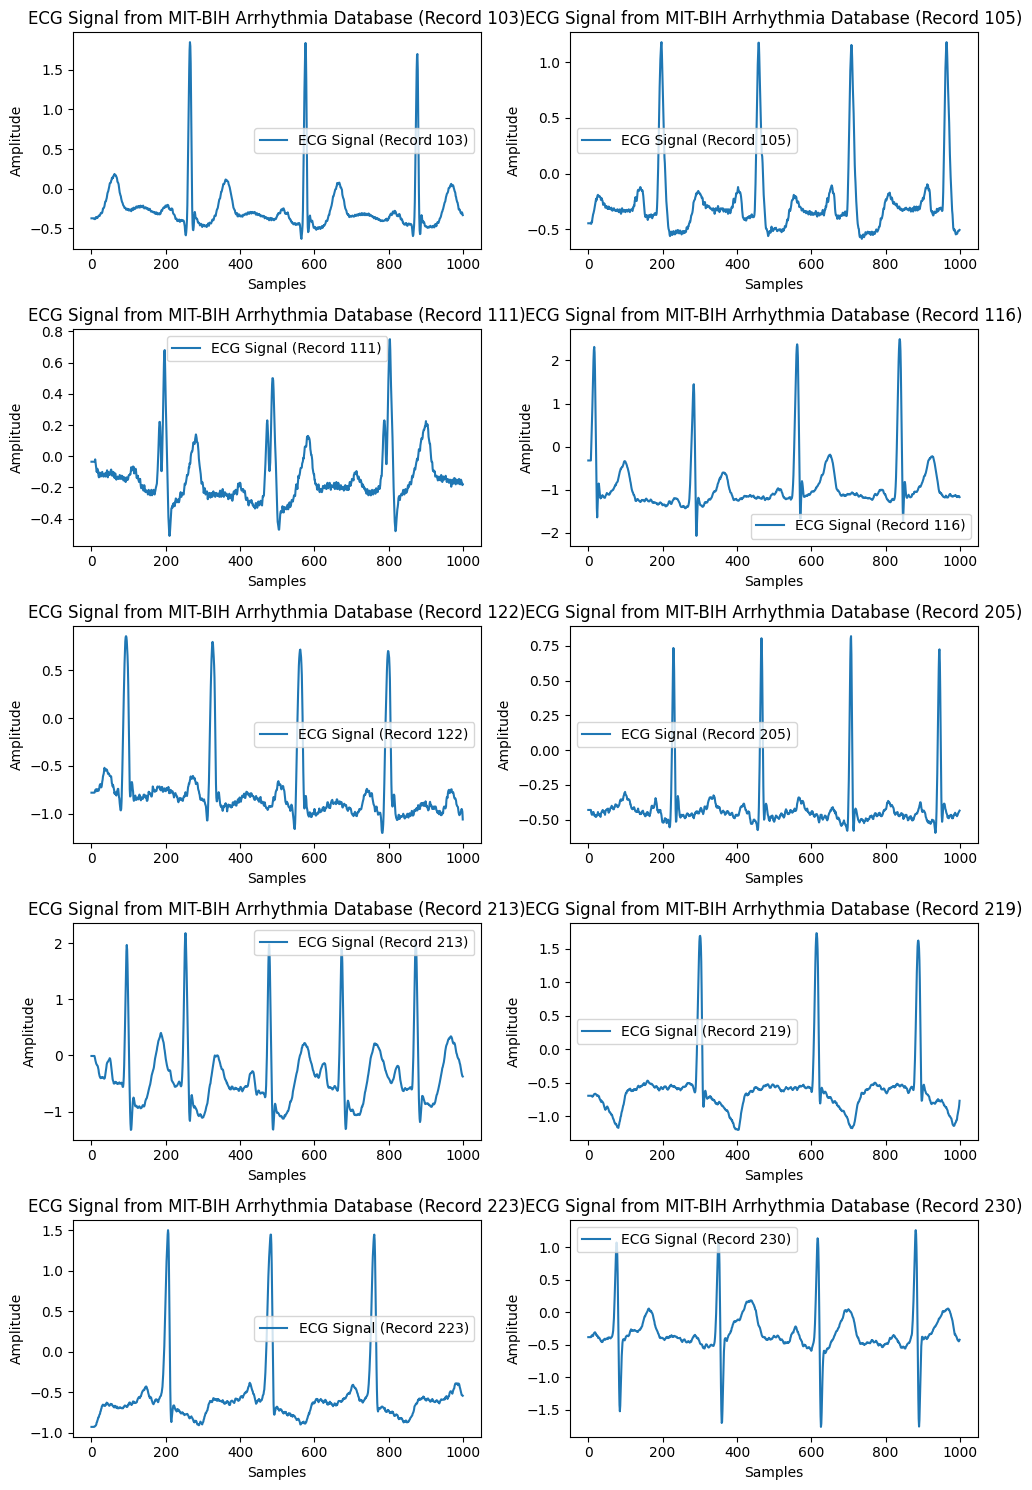

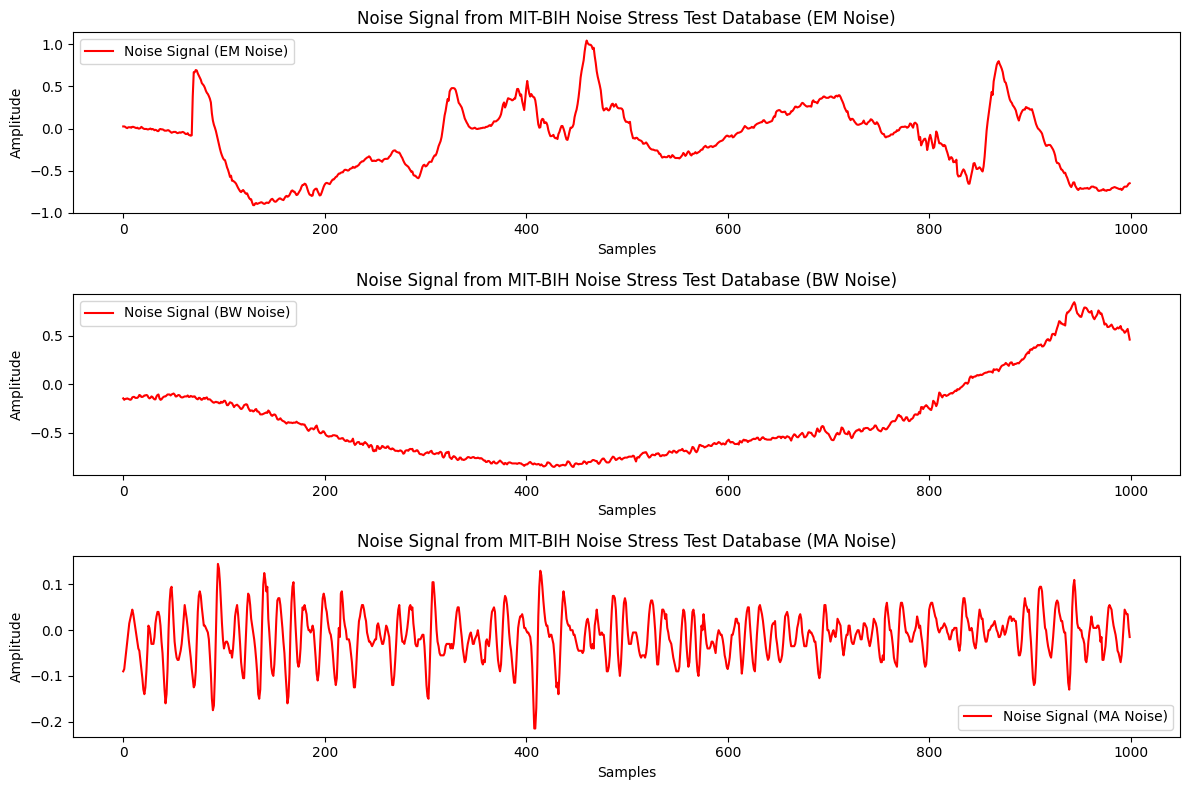

In [6]:
# Define the base path to the arrhythmia and noise records
base_path_arrhythmia = 'M:\\Dissertation\\New folder\\mit-bih-arrhythmia-database-1.0.0\\'
base_path_noise = 'M:\\Dissertation\\New folder\\mit-bih-noise-stress-test-database-1.0.0\\'

# List of arrhythmia record numbers
arrhythmia_records = ['103', '105', '111', '116', '122', '205', '213', '219', '223', '230']

# List of noise record types
noise_records = ['em', 'bw', 'ma']

# Plot the raw ECG signals
plt.figure(figsize=(10, 15))
for i, record in enumerate(arrhythmia_records):
    record_path = base_path_arrhythmia + record
    ecg_record = wfdb.rdrecord(record_path)
    ecg_signal = ecg_record.p_signal[:, 0]  # Using the first lead

    plt.subplot(5, 2, i + 1)
    plt.plot(ecg_signal[:1000], label=f'ECG Signal (Record {record})')
    plt.title(f'ECG Signal from MIT-BIH Arrhythmia Database (Record {record})')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot the noise signals
plt.figure(figsize=(12, 8))
for i, noise in enumerate(noise_records):
    noise_path = base_path_noise + noise
    noise_record = wfdb.rdrecord(noise_path)
    noise_signal = noise_record.p_signal[:, 0]

    plt.subplot(3, 1, i + 1)
    plt.plot(noise_signal[:1000], label=f'Noise Signal ({noise.upper()} Noise)', color='red')
    plt.title(f'Noise Signal from MIT-BIH Noise Stress Test Database ({noise.upper()} Noise)')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()
